# Initial Data Exploration

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Import necessary libraries for data analysis and visualization
#This cell imports the essential Python libraries for data manipulation and visualization. 
#Pandas is used for data manipulation and analysis, NumPy for numerical operations,
#Seaborn and Matplotlib for plotting and visualizing data.

In [3]:
train = pd.read_csv('/Users/ranaibrahimli/Documents/ML_Project/assets/cs-training.csv')
test = pd.read_csv('/Users/ranaibrahimli/Documents/ML_Project/assets/cs-test.csv')

In [4]:
train.shape

(150000, 12)

In [5]:
test.shape

(101503, 12)

In [6]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Data Cleaning and Preprocessing

In [7]:
#Checking and removing any duplicates in the data

train.duplicated().value_counts()

False    150000
Name: count, dtype: int64

In [8]:
#Let's delete them

train_redup = train.drop_duplicates()

In [9]:
train_redup.duplicated().sum()

0

In [10]:
#Checking the null values
#Calculate the percentage of missing values for each column in the training data

round(train_redup.isnull().sum()/train_redup.shape[0]*100, 2)

Unnamed: 0                               0.00
SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.82
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.62
dtype: float64

In [11]:
#Define a function to find missing values
def findMiss(df):
    return round(df.isnull().sum()/df.shape[0]*100, 2)

In [104]:
#Verify the shape of a potentially reduced dataset
train_redup.shape

(150000, 12)

In [13]:
#Use the findMiss function on the reduced dataset
findMiss(train_redup)

Unnamed: 0                               0.00
SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.82
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.62
dtype: float64

# Data Analysis and Visualization

In [14]:
#Finding the missing values

train_redup[train_redup.NumberOfDependents.isnull()].describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,0.0,3924.000000,3924.000000,3924.000000,3924.000000,0.0
mean,74510.281855,0.045617,10.745132,59.588940,0.908257,1083.812181,NaN,5.604230,0.834608,0.590979,0.812181,NaN
std,43703.084554,0.208679,237.699246,18.634168,8.679394,4186.731843,NaN,4.096353,8.679228,0.914455,8.678008,NaN
min,9.000000,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,36006.500000,0.000000,0.008474,48.000000,0.000000,21.000000,NaN,3.000000,0.000000,0.000000,0.000000,NaN
50%,74492.000000,0.000000,0.047458,61.000000,0.000000,358.000000,NaN,5.000000,0.000000,0.000000,0.000000,NaN
75%,112734.000000,0.000000,0.268155,74.000000,0.000000,1559.000000,NaN,8.000000,0.000000,1.000000,0.000000,NaN
max,149966.000000,1.000000,10821.000000,109.000000,98.000000,220516.000000,NaN,30.000000,98.000000,15.000000,98.000000,NaN


In [15]:
train_redup.NumberOfDependents.max()

20.0

In [16]:
train_redup['NumberOfDependents'].agg(['mode'])

,mode
0,0.0


In [17]:
train_redup.groupby(['NumberOfDependents']).size()

NumberOfDependents
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
dtype: int64

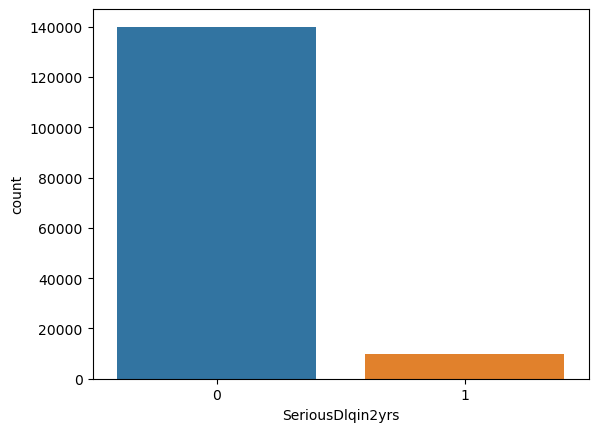

In [18]:
sns.countplot(x='SeriousDlqin2yrs', data=train_redup)
plt.show()

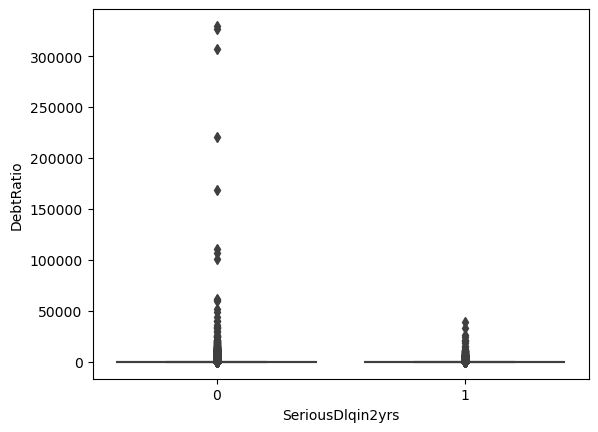

In [19]:
sns.boxplot(x='SeriousDlqin2yrs', y='DebtRatio', data=train_redup)
plt.show()

In [23]:
#This section separates the dataset into two parts based on missing values in the 'NumberOfDependents' column.
fam_miss = train_redup[train_redup.NumberOfDependents.isnull()]
fam_nmiss = train_redup[train_redup.NumberOfDependents.notnull()]

In [24]:
fam_miss.shape

(3924, 12)

In [25]:
fam_nmiss.shape

(146076, 12)

In [26]:
#Imputing Missing Data
fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)

/var/folders/ld/1jk7lfb53y7ct_9wsxfn7cz80000gn/T/ipykernel_24614/693308875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
/var/folders/ld/1jk7lfb53y7ct_9wsxfn7cz80000gn/T/ipykernel_24614/693308875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)


In [27]:
findMiss(fam_miss)

Unnamed: 0                              0.0
SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [28]:
findMiss(fam_nmiss)

Unnamed: 0                               0.00
SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.67
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [29]:
#Aggregating Statistical Measures for Income
fam_nmiss['MonthlyIncome'].agg(['mean','median','min'])

mean      6670.221237
median    5400.000000
min          0.000000
Name: MonthlyIncome, dtype: float64

In [30]:
fam_nmiss['MonthlyIncome'].agg(['max'])

max    3008750.0
Name: MonthlyIncome, dtype: float64

In [31]:
fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())

/var/folders/ld/1jk7lfb53y7ct_9wsxfn7cz80000gn/T/ipykernel_24614/100680096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())


In [32]:
#Finalizing Data Imputation
findMiss(fam_nmiss)

Unnamed: 0                              0.0
SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [33]:
filled_train = pd.concat([fam_nmiss,fam_miss])

In [34]:
#Concatenating Data Subsets
findMiss(filled_train)

Unnamed: 0                              0.0
SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [35]:
filled_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [36]:
#Analyzing Feature Distributions and Outliers
filled_train.groupby(['SeriousDlqin2yrs']).size()/filled_train.shape[0]

SeriousDlqin2yrs
0    0.93316
1    0.06684
dtype: float64

In [37]:
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [38]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.99])

0.99    1.092956
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [39]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,77655.004149,0.070539,3564.023932,50.630705,0.186722,571.918644,7310.817427,5.763485,0.074689,1.186722,0.087137,0.651452
std,41010.846073,0.256587,5123.802683,14.565389,0.579502,1772.948412,5964.524303,3.114160,0.579711,1.065750,0.559651,1.022093
min,294.000000,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,44564.000000,0.000000,941.000000,39.000000,0.000000,0.217813,5000.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,80200.000000,0.000000,2012.000000,48.000000,0.000000,0.402560,5400.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,111663.000000,0.000000,4116.000000,62.000000,0.000000,59.000000,8607.000000,7.000000,0.000000,2.000000,0.000000,1.000000
max,149280.000000,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


In [40]:
#Dropping Outliers Based on Revolving Utilization
util_droped = filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].index)

<Axes: >

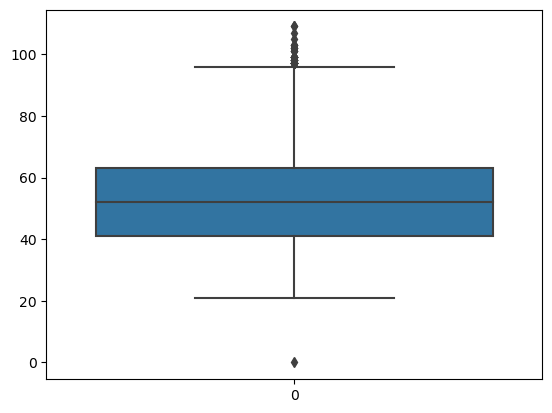

In [41]:
#Visualizing Age Distribution After Outlier Removal
#The majority of the data points fall within the box, suggesting a consistent age range among most of the borrowers, with only a few borrowers being significantly younger or older than the rest.
sns.boxplot(util_droped['age'])

In [42]:
util_droped.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

NumberOfTime30-59DaysPastDueNotWorse
0     125804
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
dtype: int64

In [43]:
util_droped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

NumberOfTime60-89DaysPastDueNotWorse
0     142166
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       264
dtype: int64

In [44]:
util_droped.groupby(['NumberOfTimes90DaysLate']).size()

NumberOfTimes90DaysLate
0     141429
1       5238
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
dtype: int64

In [45]:
#Analyzing Delinquency in Relation to Serious Delinquency
util_droped[util_droped['NumberOfTimes90DaysLate']>=96].head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1733,1734,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.0
2286,2287,0,1.0,22,98,0.0,5400.0,0,98,0,98,0.0
3884,3885,0,1.0,38,98,12.0,5400.0,0,98,0,98,0.0
4417,4418,0,1.0,21,98,0.0,0.0,0,98,0,98,0.0
4705,4706,0,1.0,21,98,0.0,2000.0,0,98,0,98,0.0


In [46]:
util_droped[util_droped['NumberOfTimes90DaysLate']>=96]['SeriousDlqin2yrs'].describe()

count    269.000000
mean       0.546468
std        0.498764
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [47]:
#Grouping by Serious Delinquency After Removing Extreme Cases of Late Payments

util_droped[util_droped['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    122
1    147
dtype: int64

In [48]:
util_droped.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [49]:
util_droped['DebtRatio'].describe()

count    149759.000000
mean        352.652789
std        2038.203228
min           0.000000
25%           0.174960
50%           0.366483
75%           0.866946
max      329664.000000
Name: DebtRatio, dtype: float64

<Axes: xlabel='DebtRatio', ylabel='Density'>

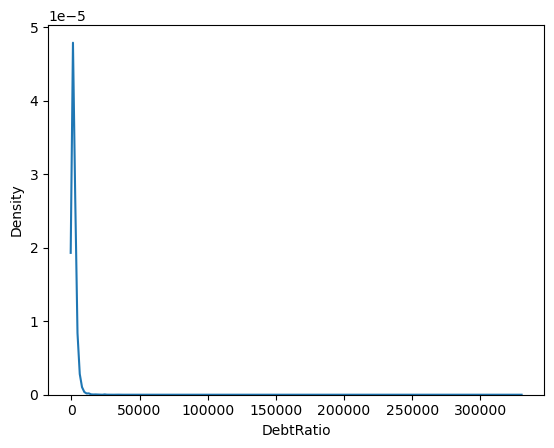

In [50]:
sns.kdeplot(util_droped['DebtRatio'])

In [51]:
#Calculating the 97.5th percentile of the 'DebtRatio' variable, which is a common technique to identify and potentially remove outliers.
util_droped['DebtRatio'].quantile([.975])

0.975    3487.05
Name: DebtRatio, dtype: float64

In [52]:
util_droped[util_droped['DebtRatio']>3492][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3727.000000,3727.000000
mean,0.064395,4798.715321
std,0.245488,1698.867567
min,0.000000,0.000000
25%,0.000000,5400.000000
50%,0.000000,5400.000000
75%,0.000000,5400.000000
max,1.000000,5400.000000


In [53]:
temp = util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])]

In [54]:
#isolating specific cases and examining the size of each group concerning serious delinquency. 
temp.groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    380
1      2
dtype: int64

In [55]:
#Removing the nondefaulters
dRatio = util_droped.drop(util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])].index)

In [56]:
dRatio.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


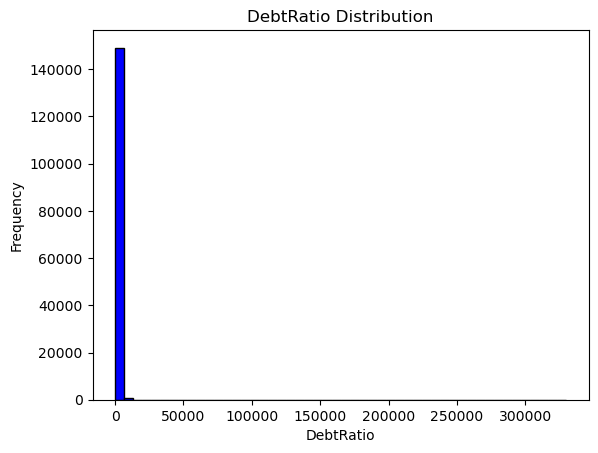

In [57]:
plt.hist(util_droped['DebtRatio'], bins=50, color='blue', edgecolor='black')
plt.title('DebtRatio Distribution')
plt.xlabel('DebtRatio')
plt.ylabel('Frequency')
plt.show()

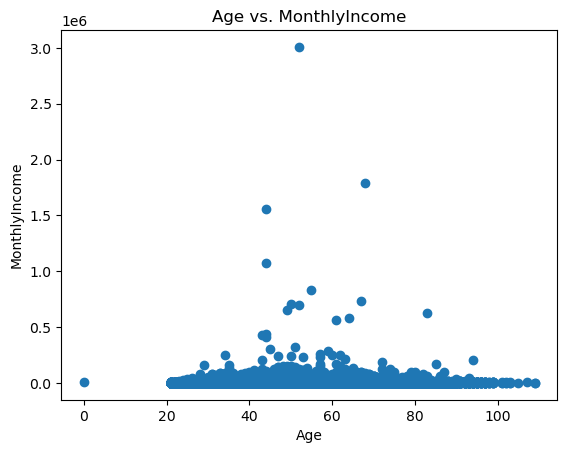

In [58]:
plt.scatter(util_droped['age'], util_droped['MonthlyIncome'])
plt.title('Age vs. MonthlyIncome')
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.show()

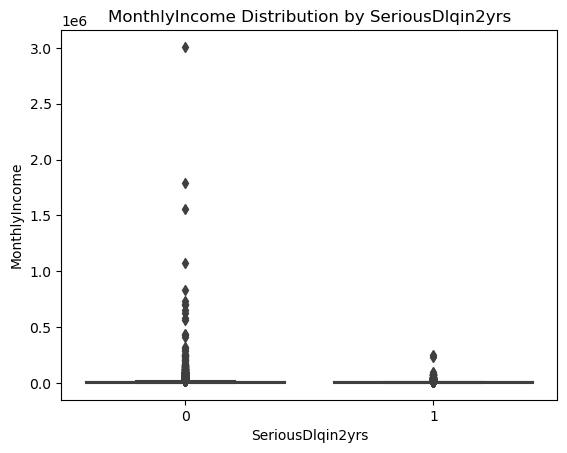

In [59]:
sns.boxplot(x='SeriousDlqin2yrs', y='MonthlyIncome', data=util_droped)
plt.title('MonthlyIncome Distribution by SeriousDlqin2yrs')
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('MonthlyIncome')
plt.show()

/var/folders/ld/1jk7lfb53y7ct_9wsxfn7cz80000gn/T/ipykernel_24614/433588904.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(util_droped[util_droped['SeriousDlqin2yrs'] == 0]['MonthlyIncome'], label='Not SeriousDlqin2yrs', shade=True)
/var/folders/ld/1jk7lfb53y7ct_9wsxfn7cz80000gn/T/ipykernel_24614/433588904.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(util_droped[util_droped['SeriousDlqin2yrs'] == 1]['MonthlyIncome'], label='SeriousDlqin2yrs', shade=True)


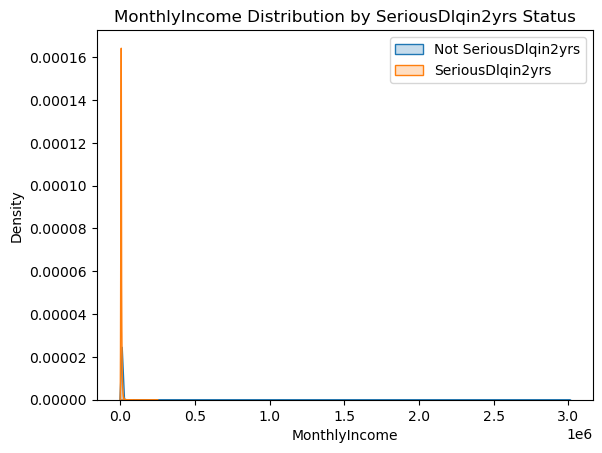

In [60]:
sns.kdeplot(util_droped[util_droped['SeriousDlqin2yrs'] == 0]['MonthlyIncome'], label='Not SeriousDlqin2yrs', shade=True)
sns.kdeplot(util_droped[util_droped['SeriousDlqin2yrs'] == 1]['MonthlyIncome'], label='SeriousDlqin2yrs', shade=True)
plt.title('MonthlyIncome Distribution by SeriousDlqin2yrs Status')
plt.xlabel('MonthlyIncome')
plt.ylabel('Density')
plt.legend()
plt.show()

In [61]:
corr = util_droped.corr()  


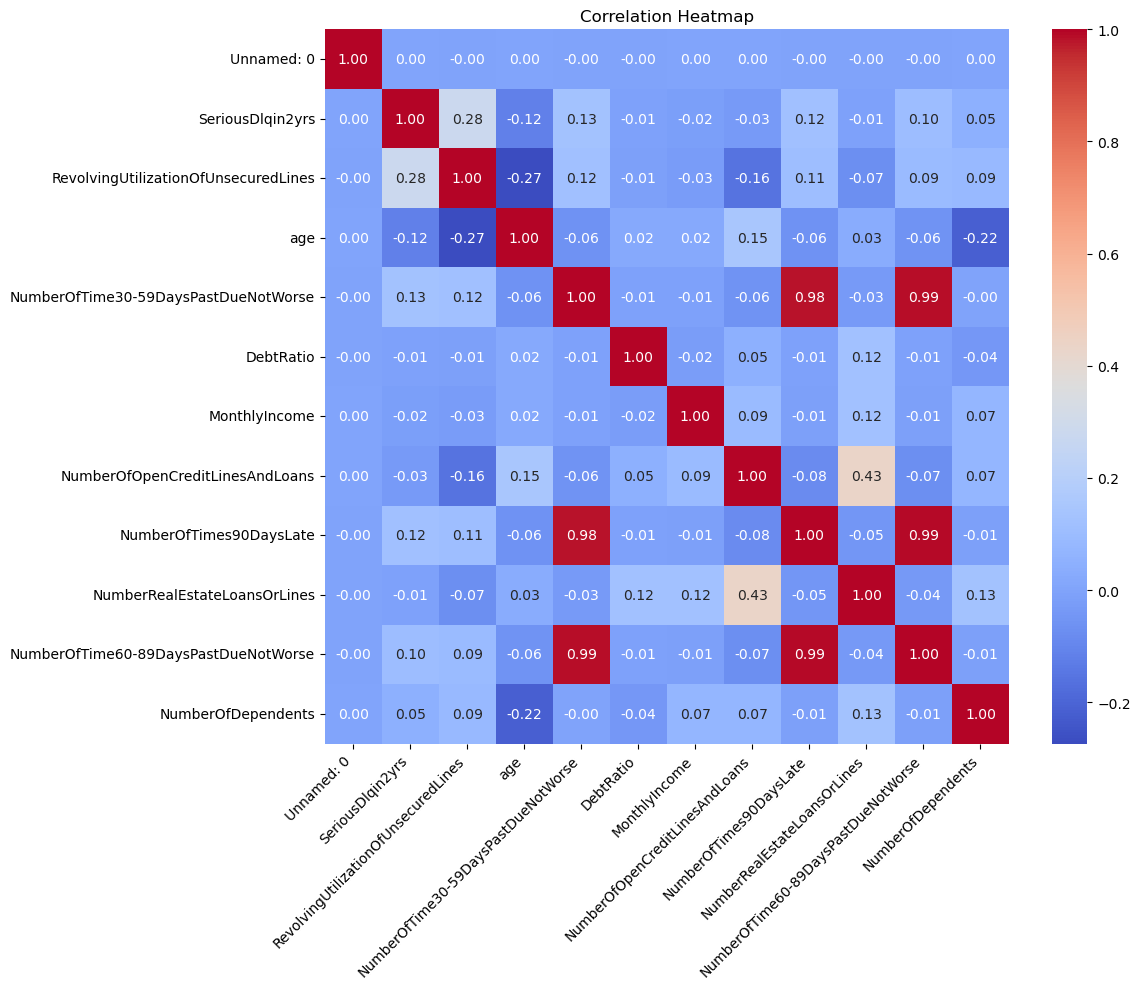

In [62]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [108]:
#Impute missing values before splitting
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [109]:
#Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [111]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [112]:
#Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [113]:
#Make predictions
y_pred = model.predict(X_test)

# Model Evaluation

In [114]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.52      0.04      0.07      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.52      0.52     30000
weighted avg       0.91      0.94      0.91     30000



In [119]:
X = train_redup.drop('SeriousDlqin2yrs', axis=1)  # Features
y = train_redup['SeriousDlqin2yrs']  # Target variable


In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train) 
X_train_imputed = imputer.transform(X_train) 
X_test_imputed = imputer.transform(X_test)

In [117]:
imputer = SimpleImputer(strategy='mean')


In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_imputed)  # Fit the scaler on the imputed training data
X_train_scaled = scaler.transform(X_train_imputed)  # Scale the imputed training data
X_test_scaled = scaler.transform(X_test_imputed)  # Scale the imputed test data


In [72]:
# Scale the features after imputation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [73]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

In [74]:
# Fit the model on the scaled and imputed training data
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [75]:
# Drop rows with missing values
X_train_dropped = X_train.dropna()
y_train_dropped = y_train.loc[X_train_dropped.index]

In [77]:
# Predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:,1]


In [78]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.52      0.04      0.07      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.52      0.52     30000
weighted avg       0.91      0.94      0.91     30000



In [79]:
# Compute and print AUC score
print("AUC Score: ", roc_auc_score(y_test, y_pred_proba))

AUC Score:  0.6928858179040299


# Feature Importance

In [84]:
!pip install graphviz


In [85]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn import tree

In [86]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [87]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [88]:
y_pred_dt = dt_classifier.predict(X_test)


In [89]:
!dot -V


dot - graphviz version 9.0.0 (20230911.1827)


In [90]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import display


In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)  # Set a small depth to make the tree smaller

In [93]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [94]:
dot_data = export_graphviz(dt_classifier, out_file=None, feature_names=X_train.columns, 
                           class_names=['No Default', 'Default'], filled=True, 
                           rounded=True, special_characters=True)

In [95]:
graph = Source(dot_data)

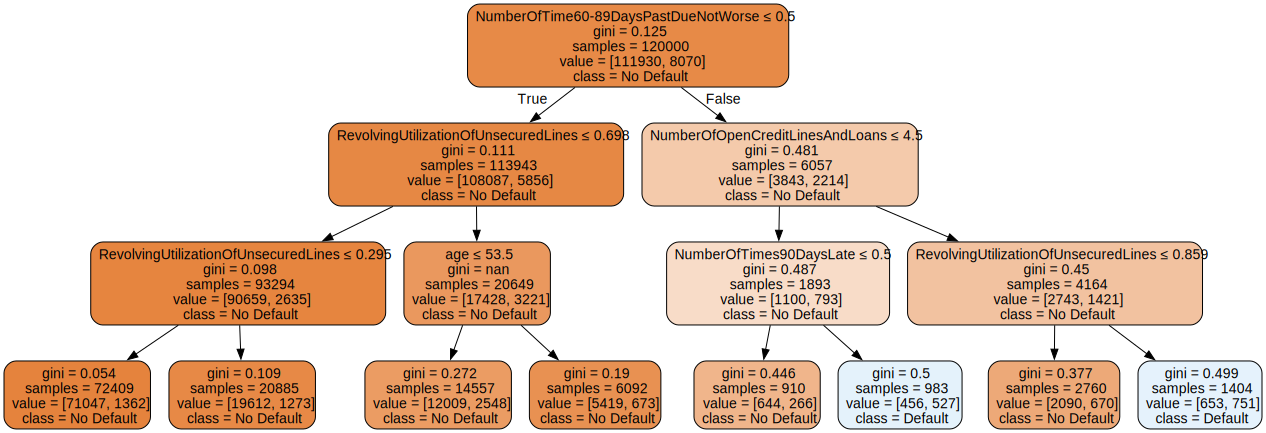

In [96]:
display(graph)

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [98]:
imputer = SimpleImputer(strategy='mean')


In [99]:
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [100]:
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)


In [101]:
rf_classifier.fit(X_train_imputed, y_train)


RandomForestClassifier(random_state=42)

In [102]:
predictions = rf_classifier.predict(X_test_imputed)

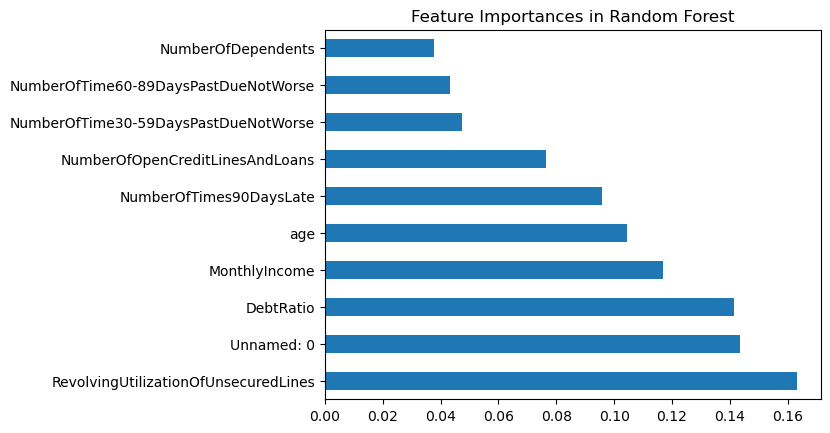

In [103]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')  # You can adjust the number as needed
plt.title('Feature Importances in Random Forest')
plt.show()

# Conclusion

We can notice that LogisticRegression generally performed better that RandomForestClassifier